# 다양한 모델을 결합한 앙상블
- 앙상블
- 다수결 투표 앙상블(Voting)
- 배깅(Bagging)
- 그래이언트 부스팅 & XGBoost
- 모델성능 평가 및 비교

단일모델의 한계
- 과대적합, 과소적합
- 높은 분산
- 높은 편향

---

## 앙상블 (집단지성)
- 배경: 같은 알고리즘, 다른 데이터셋(Bootstrap)  `RandomForest` 분산감소
- 부스팅: 순차적으로 약한 학습기를 강화           `AdaBoost`, `XGBoost` 편향감소
- 스태깅: 다른 알고리즘을 메타 모델로 학습        `Stacked Generalization` 일반화 성능


### 1. **Voting**
- 하나의 모델보다 **여러 모델의 예측을 결합**하여 더 안정적이고 일반화된 결과를 얻는 기법 <br>
- 각 모델은 서로 다른 알고리즘 또는 하이퍼파라미터를 사용 (예: SVM, KNN, Decision Tree 등)  <br>
- 단일 모델의 편향(bias)이나 분산(variance)을 줄이는 데 효과적  <br>
> `Hard Voting`: 다수결 투표 - 각 모델이 예측한 **클래스 라벨** 중 다수결로 최종 클래스를 결정  
- 예시:  
  - 모델 A → 0  
  - 모델 B → 1  
  - 모델 C → 1  
  👉 최종 예측 = **1**
> `Soft Voting`: 확률 평균 - 각 모델이 예측한 **클래스별 확률값(probability)** 을 평균 내고, 확률이 가장 높은 클래스를 선택
- 보통 Hard Voting보다 성능이 좋음
- 예시:  
  - 모델 A: [0.3, 0.7]  
  - 모델 B: [0.6, 0.4]  
  - 모델 C: [0.4, 0.6]  
  👉 평균 확률 [0.43, 0.57] → 최종 예측 = **1**

| 구분  | Hard Voting | Soft Voting                 |
| --- | ----------- | --------------------------- |
| 기준  | 다수결         | 확률 평균                       |
| 입력값 | 클래스 라벨      | 클래스별 확률                     |
| 장점  | 간단, 빠름      | 예측 확률 반영, 더 정교함             |
| 주의점 | 확률 정보 없음    | `predict_proba()` 지원 모델만 가능 |


### 2. **Bagging (Bootstrap Aggregation)**
- 하나의 데이터셋을 여러 번 샘플링 -> 여러 모델 병렬 학습 후 평균 내기
- 데이터의 다양성(Data Diversity)** 을 이용해 모델의 **분산(Variance)을 줄이는** 앙상블 방법  
- 같은 알고리즘(예: Decision Tree)을 여러 번 학습하지만, 매번 **다른 데이터 샘플(부트스트랩 샘플)** 로 학습함  
- 각 모델의 예측 결과를 **평균(회귀)** 또는 **투표(분류)** 로 결합

> - `Bootstrap`: 원본 학습 데이터에서 **복원추출** 방식으로 여러 샘플 세트를 만듦
> - Train: 각 샘플 세트마다 **별도의 모델**을 독립적으로 학습
> - `Aggregation`: 모든 모델의 예측 결과를 **평균(회귀)** 또는 **투표(분류)** 로 결합
> <br>
> <br>
> [전체 데이터] <br>
> ↓ (복원추출) <br>
> [데이터1] → 모델1 학습 <br>
> [데이터2] → 모델2 학습 <br>
> [데이터3] → 모델3 학습 <br>
> ↓ <br>
> 예측 결과를 평균/투표 → 최종 예측
- 대표 알고리즘: `RandomForest`
- 효과: 과적합 방지 = 모델의 분산을 줄임


### 3. **Boosting**
**앞선 모델의 오차(실수)를 보완하면서 순차적으로 학습하는 방식**
- Bagging이 여러 모델을 **독립적으로 병렬 학습**하는 방식이라면,
- **Boosting**은 모델들을 **순차적으로 학습**시킴.  
- 각 단계에서 **앞선 모델이 틀린 데이터를 더 잘 학습하도록 가중치를 조정**  
- 목적: **편향(Bias)** 을 줄이고 **정확도(Accuracy)** 를 높이는 것
> 1. 모델 1 (기본 학습)
- 전체 데이터를 학습하고 예측
- 오답(틀린 데이터) 식별  
>  2. 가중치 조정
- 모델 1이 틀린 오답에 **더 높은 가중치(중요도)** 부여  
> 3. 모델 2 (보완 학습)
- 조정된 가중치(즉, 중요도 반영된 데이터)로 학습  
> 4. 모델 3 이후 (반복 보완)
- 이전 모델(모델 1, 2)이 공통으로 틀린 문제에 집중  
- 오답에 다시 가중치 부여 → 반복적으로 학습 성능 개선  
> 5. 최종 단계 (결합)
- 각 모델의 예측 결과를 **가중 평균(Weighted Average)** 으로 결합  
- 더 성능이 좋은 모델에 높은 가중치 부여

- 대표 알고리즘:
    - `AdaBoost` (Adaptive Boosting)
    - `Gradient Boosting`
    - `XGBoost / LightGBM / CatBoost`



### 4. **Stacking**
여러 개의 다른 모델(Base)들의 **예측 결과를 다시 하나의 메타 모델(Meta)** 이 학습하는 방식의 다층 앙상블 기법
- **여러 모델의 예측값을 입력(feature)** 으로 사용해, 최종 모델이 이를 **종합적으로 판단**하도록 학습시키는 방법  
- Voting은 단순 평균이나 다수결을 사용하는 반면, `Stacking`은 **“예측 결과를 다시 학습”** 한다는 점이 다름  
> <구조>
> 1. Base Model 학습: 여러 개의 모델(ex. SVM, RandomForest, KNN 등)을 원본 데이터로 각각 학습시킴 <br>
> 2. Meta Model 학습: Base 모델들의 예측을 **새로운 입력(feature)** 으로 메타 모델(ex. Logistic Regression)을 학습 <br>
> 3. 최종적으로 각 모델의 “예측 조합”을 학습하여 더 높은 정확도 달성


---

## 🧩 앙상블 학습(Ensemble Learning) 비교 요약

> 여러 모델을 결합해 예측 성능을 향상시키는 대표적인 4가지 방법 비교

| 구분 | Voting | Bagging | Boosting | Stacking |
|------|---------|----------|-----------|-----------|
| **핵심 개념** | 여러 모델의 예측을 **투표**로 결합 | 데이터를 복원추출해 여러 모델을 **병렬 학습** | 이전 모델의 오차를 보완하며 **순차 학습** | 여러 모델의 예측값을 **메타 모델이 재학습** |
| **학습 구조** | 병렬 (Parallel) | 병렬 (Parallel) | 순차 (Sequential) | 2단계 구조 (Base + Meta) |
| **데이터 처리 방식** | 동일 데이터 사용 | 복원추출로 샘플링 | 오답에 가중치 부여 | 1단계 예측값을 2단계 입력으로 사용 |
| **가중치 조정 여부** | X | X | O (오답에 높은 가중치) | O (메타 모델이 자동 조정) |
| **대표 모델** | - | Random Forest | AdaBoost, Gradient Boosting, XGBoost | StackingClassifier |
| **목적** | 단순 예측 안정화 | 분산(Variance) 감소 | 편향(Bias) 감소 | 종합 판단으로 성능 극대화 |
| **장점** | 구현 간단, 빠름 | 과적합 방지, 안정적 | 높은 정확도, 성능 향상 | 다양한 모델 결합, 일반화 우수 |
| **단점** | 단순 평균에 의존 | 계산량 증가 | 노이즈에 민감, 느림 | 구조 복잡, 과적합 위험 |
| **결합 방식** | 다수결 / 확률 평균 | 평균 / 투표 | 가중 평균 | 메타 모델의 예측 |
| **출력 예시** | Hard / Soft Voting | 평균값 / 투표 | 단계별 보완 결과 | 메타 모델의 최종 예측 |


**💡 정리**

- **Voting** → 단순 투표로 예측 안정화  
- **Bagging** → 데이터 샘플링으로 분산 감소  
- **Boosting** → 오차 보완으로 편향 감소  
- **Stacking** → 예측 결과를 재학습해 최종 성능 극대화  


📘 **한 줄 요약:**  
> 🗳️ Voting은 단순 결합,  
> 🧺 Bagging은 병렬 다중학습,  
> 🚀 Boosting은 순차적 보완학습,  
> 🧱 Stacking은 예측 결과를 다시 학습하는 **2단계 앙상블 기법**이다.


---


#### 예제1: Voting

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np


# 데이터 생성
X,y = make_classification(n_samples=500, n_features=2, random_state=42, n_redundant=0)
np.unique(y,return_counts=True)

(array([0, 1]), array([249, 251]))

In [29]:
# 훈련/테스트 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# 개별모델 생성
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42, probability=True)
knn = KNeighborsClassifier()

lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)


# Voting 앙상블
voting_hard = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)], voting='hard')
voting_soft = VotingClassifier(estimators=[('lr',lr),('svm',svm),('knn',knn)], voting='soft')

voting_hard.fit(X_train,y_train)
voting_soft.fit(X_train,y_train)

models = [
    ('lr',lr),
    ('svm',svm),
    ('knn',knn),
    ('voting_hard',voting_hard),
    ('voting_soft',voting_soft)
]


for label, model in models:
    print(label, model.score(X_test,y_test))

lr 0.88
svm 0.89
knn 0.93
voting_hard 0.9
voting_soft 0.91


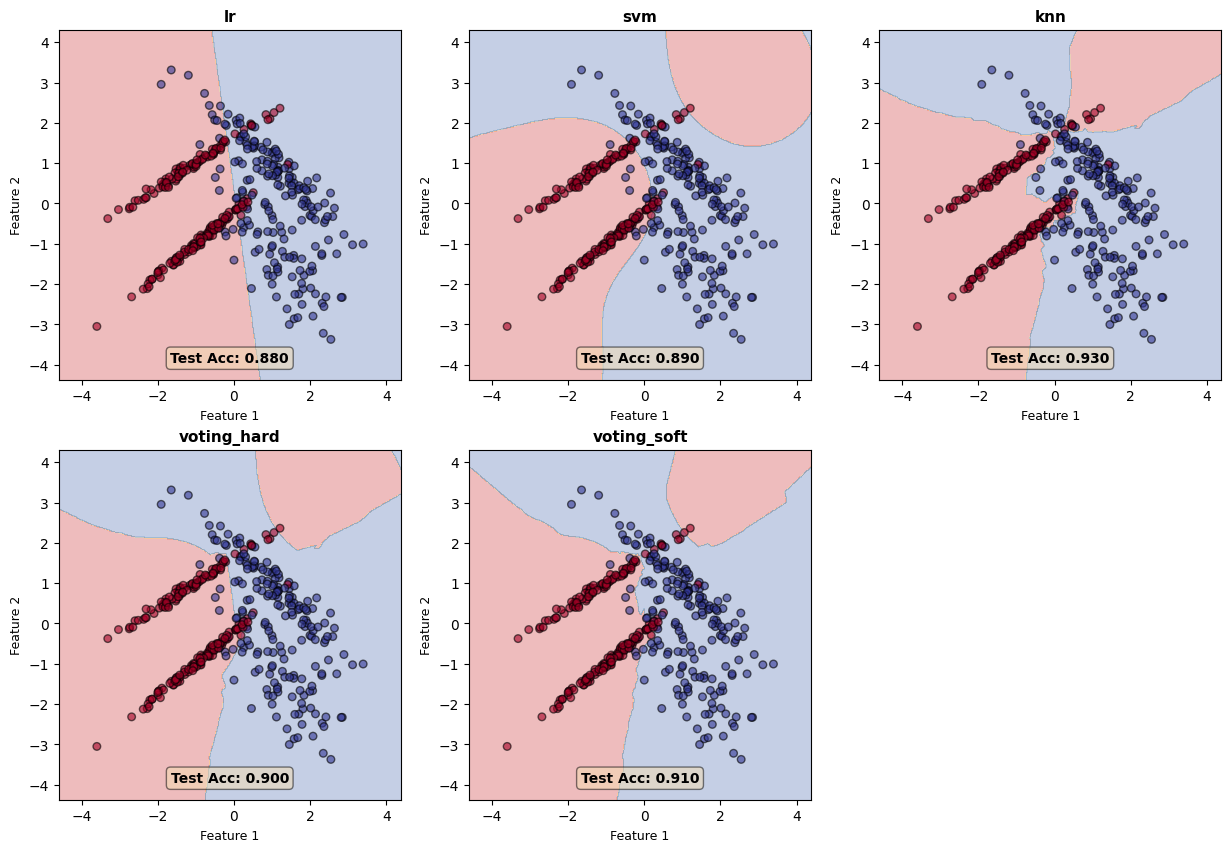

In [30]:
# 결정 경계 시각화
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
              edgecolor='black', s=30, alpha=0.6)
    ax.set_title(title, fontsize=11, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=9)
    ax.set_ylabel('Feature 2', fontsize=9)

# 5개 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, (title ,model) in enumerate(models):
  row = idx // 3
  col = idx % 3
  plot_decision_boundary(model, X_train, y_train, title, axes[row, col])

  # 정확도 표시
  score = model.score(X_test, y_test)
  axes[row, col].text(0.5, 0.05, f'Test Acc: {score:.3f}',
                      transform=axes[row, col].transAxes,
                      ha='center', fontsize=10, weight='bold',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 마지막 서브플롯 제거
axes[1, 2].remove()

In [31]:
# Q: 어떤 종류의 모델들을 조합?
# 다양성이 중요하다! 서로다른 가정을 가진 모델을 조합함
# 선형모델 + 비선형모델 + 인스턴스기반(KNN)

#### 예제2: Bagging

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA

X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

In [33]:
# 시각화를 위해서?
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 모델 생성
tree = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# 학습
tree.fit(X_train,y_train)
bagging.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


<bound method Axes.scatter of <Axes: >>

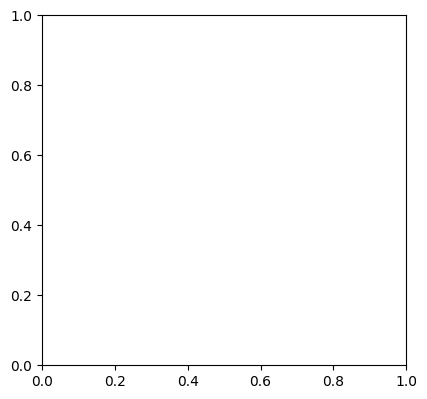

In [34]:
# 시각화
fig = plt.figure(figsize=(16,10))

# 1. 원본 데이터
ax1 = plt.subplot(2,3,1)
ax1.scatter